<ipython-input-1-0eb8af508a41>:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(file_path, parse_dates=['Date'], infer_datetime_format=True)
<ipython-input-1-0eb8af508a41>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=['Date'], infer_datetime_format=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB
None
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


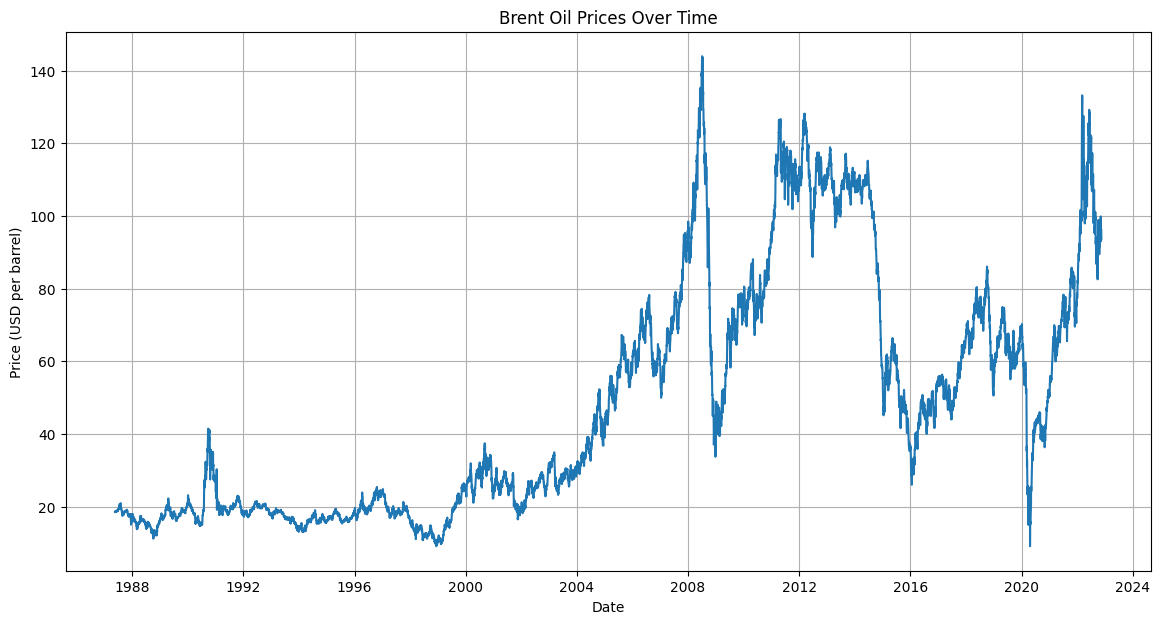

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Data
file_path = '/data/BrentOilPrices.csv'  # Specify the path to your CSV file

df = pd.read_csv(file_path, parse_dates=['Date'], infer_datetime_format=True)

# Step 2: Drop any missing values (if needed)
df.dropna(inplace=True)

# Step 3: Verify the data types and contents
print(df.info())
print(df.head())

# Visualize the data
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'])
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.grid()
plt.show()

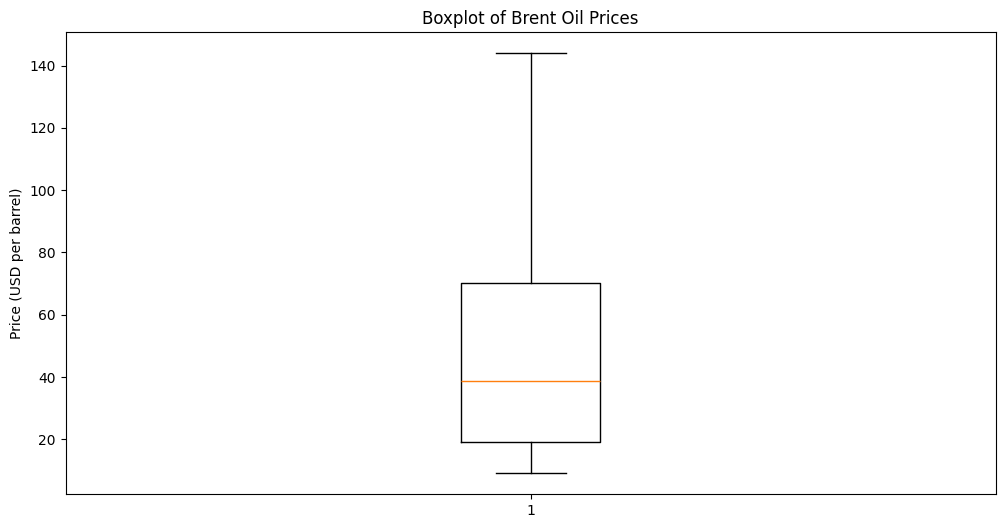

In [2]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['Price'])
plt.title('Boxplot of Brent Oil Prices')
plt.ylabel('Price (USD per barrel)')
plt.show()

<ipython-input-7-8ce8708e34a8>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Coerce unparseable dates to NaT


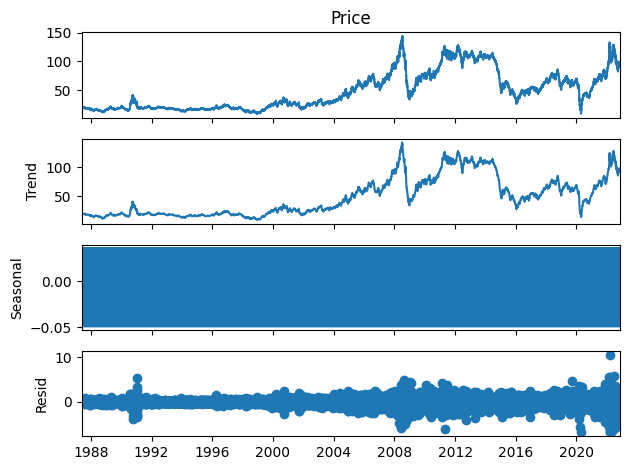

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load your data
df = pd.read_csv('/content/drive/MyDrive/10academy/Week 10/data/BrentOilPrices.csv')

# Step 2: Convert 'Date' to datetime format with error handling
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Coerce unparseable dates to NaT

# Check for any NaT values in the 'Date' column
if df['Date'].isna().any():
    print("There are some unparseable dates:")
    print(df[df['Date'].isna()])  # Display rows with NaT

# Step 3: Set 'Date' as the index
df.set_index('Date', inplace=True)

# Step 4: Ensure the index has a daily frequency
df = df.asfreq('D')  # This will create a daily frequency and introduce NaNs for missing days

# Step 5: Handle missing values if any
df['Price'] = df['Price'].ffill()  # Forward fill missing prices without inplace

# Step 6: Decompose the time series
decomposition = seasonal_decompose(df['Price'], model='additive')
decomposition.plot()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.948821610594066
p-value: 0.30945362507936497


In [9]:
from statsmodels.tsa.arima.model import ARIMA

# Example values for p, d, q (you should replace these with your chosen values)
p = 1  # Adjust based on PACF plot
d = 1  # Typically, you will set this to 1 for differencing
q = 1  # Adjust based on ACF plot

# Fit the ARIMA model
model = ARIMA(df['Price'], order=(p, d, q))  # Replace (p, d, q) with chosen values
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                12963
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -18569.935
Date:                Mon, 04 Nov 2024   AIC                          37145.870
Time:                        17:13:46   BIC                          37168.280
Sample:                    05-20-1987   HQIC                         37153.359
                         - 11-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8174      0.080    -10.231      0.000      -0.974      -0.661
ma.L1          0.8281      0.077     10.716      0.000       0.677       0.980
sigma2         1.0278      0.004    266.172      0.0